<a href="https://colab.research.google.com/github/kid-116/AI-in-WebDev-SMP/blob/main/K-Means/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>K-Means Clustering</h1>
<h2>by kid116</h2>

<h3>Importing Libraries</h3>

In [355]:
import numpy as np
import matplotlib.pyplot as plt
import random

<h3>The Dataset</h3>

In [356]:
# Constants
m = 20

In [357]:
IQs = np.random.rand(1, m) # Random values in range [0, 1)
IQs *= 200 # IQ ranges from 0 - 200
print(IQs)

[[185.6465373  151.06464448  41.26239291 186.4181378  153.59414358
  120.10024061  13.76182831 171.42007982 147.58816774 119.2038085
  104.48813398 183.56586466  66.23339475  13.10153505  89.14452189
   60.025784    88.22674397 126.27058793   2.33264615 145.28561924]]


In [358]:
EQs = np.random.rand(1, m)
EQs *= 200 # EQ also ranges from 0 - 200 it seems
print(EQs)

[[  9.89368106 199.22801093 171.36732136  63.94955027 172.59593296
  184.7454832  107.25106581  84.50413206 135.46001069  87.06664443
   55.38022389 170.70136821  26.0970917  102.82910086  28.34264984
  112.98765648 185.70621231 120.66207216 106.52812746 168.02805578]]


In [359]:
X = np.vstack((IQs, EQs)).T
print(X)

[[185.6465373    9.89368106]
 [151.06464448 199.22801093]
 [ 41.26239291 171.36732136]
 [186.4181378   63.94955027]
 [153.59414358 172.59593296]
 [120.10024061 184.7454832 ]
 [ 13.76182831 107.25106581]
 [171.42007982  84.50413206]
 [147.58816774 135.46001069]
 [119.2038085   87.06664443]
 [104.48813398  55.38022389]
 [183.56586466 170.70136821]
 [ 66.23339475  26.0970917 ]
 [ 13.10153505 102.82910086]
 [ 89.14452189  28.34264984]
 [ 60.025784   112.98765648]
 [ 88.22674397 185.70621231]
 [126.27058793 120.66207216]
 [  2.33264615 106.52812746]
 [145.28561924 168.02805578]]


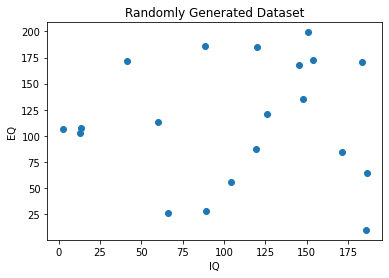

In [360]:
plt.scatter(IQs, EQs)
plt.xlabel("IQ")
plt.ylabel("EQ")
plt.title("Randomly Generated Dataset")
plt.show()

<h3>Methods for K-Means</h3>

In [361]:
def calc_dist(x1, x2):
  return abs(x1[0] - x2[0]) + abs(x1[1] - x2[1])

In [372]:
def run_kmeans(X, k):
  # Some constants
  m = X.shape[0]
  n = X.shape[1]
  # Initializing centroids
  centroids = np.random.rand(k, n)
  cluster_id = np.ones(m) * -1
  # Training
  while True:
    cost = 0
    # Assigning to centroids
    for p in range(m):
      min_dist = float('inf')
      for c in range(k):
        dist = calc_dist(X[p], centroids[c])
        if dist < min_dist:
          min_dist = dist
          cluster_id[p] = c
      cost += min_dist
    cost /= m
    # print(cost)
    # Calculating new centroids
    old_centroids = np.copy(centroids)
    for c in range(k):
      l = 1 # Number of points assigned to the cluster
      for p in range(m):
        if cluster_id[p] == c:
          centroids[c] += X[p]
          l = l + 1
      centroids[c] /= l
    div = np.sum(np.absolute(centroids - old_centroids))
    # print(div, end=" ")
    if div == 0:
      # print('\n', div)
      break
  return cost, cluster_id, centroids    

<h3>Choosing the Best k</h3>

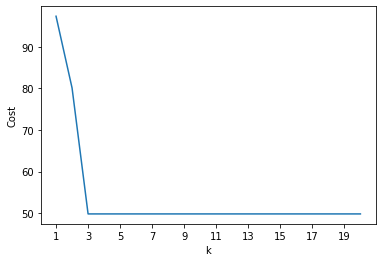

In [376]:
costs = []
ks = np.arange(1, 21, 1)

for k in ks:
  cost, cluster_id, centroids = run_kmeans(X, k)
  costs.append(cost)

plt.plot(ks, costs)
plt.xlabel("k")
plt.ylabel("Cost")
plt.xticks(np.arange(1, 21, 2))
plt.show()

<h3>Training</h3>

In [377]:
k = 3
cost, cluster_id, centroids = run_kmeans(X, k)

<h3>Plotting</h3>

In [378]:
colmap = {
    0: 'b',
    1: 'r',
    2: 'g',
    3: 'c',
    4: 'm',
    5: 'y',
    6: 'k',
}

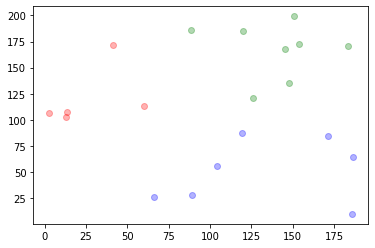

In [379]:
# for c in range(k):
#   plt.scatter(centroids[c][0], centroids[c][1], c=colmap[c])
for p in range(m):
  plt.scatter(X[p][0], X[p][1], c=colmap[cluster_id[p]], alpha=0.3)

plt.show()

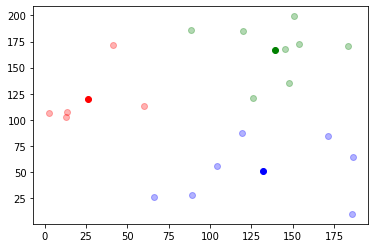

In [380]:
for c in range(k):
  plt.scatter(centroids[c][0], centroids[c][1], c=colmap[c])
for p in range(m):
  plt.scatter(X[p][0], X[p][1], c=colmap[cluster_id[p]], alpha=0.3)

plt.show()